# Tweet Statistic Visualization and Graphs 

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import seaborn as sns
%matplotlib inline

## Access the Data 
Create the dataframes `tweets` and `orig_tweets` 

In [2]:
conn = sqlite3.connect("en_lupus.sqlite") # open the SQLite connection 
tweets = pd.read_sql_query("SELECT * FROM hashtags;", conn) # get all the tweets
tweets['created_at'] = pd.to_datetime(tweets['created_at']) # make timestamps usable 
orig_tweets = tweets[tweets['retweeted_status'] == 0] # only original tweets, i.e. no retweets
conn.close() # close the SQLite connection

## Simple Visualization

Axes(0.125,0.125;0.775x0.755)


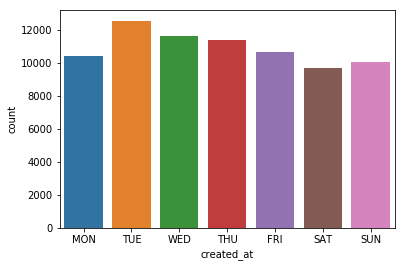

In [10]:
day_of_week_names = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
orig_tweet_day_of_week = orig_tweets['created_at'].apply(lambda t: day_of_week_names[t.dayofweek])
print(sns.countplot(orig_tweet_day_of_week, order=day_of_week_names))